<a href="https://colab.research.google.com/github/archana-nagaraja/world_happiness/blob/main/EDA_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project presents an exploratory data analysis (EDA) of the World Happiness Report, a global survey of subjective well-being that ranks countries based on factors influencing happiness and life satisfaction.


The goals of this analysis are to:

1) Identify the top and bottom-ranking countries in terms of happiness.

2) Explore relationships between happiness scores and socioeconomic indicators such as GDP per capita, social support, healthy life expectancy, freedom, and corruption perception.

3) Visualize global and regional patterns using interactive and geographical charts.

4) Study trends over time to understand how global happiness has evolved.

5) Analyze differences by region or income group, providing insight into structural factors behind happiness disparities.

Through data-driven storytelling and visual insights, this project aims to uncover the underlying drivers of happiness around the world and how they vary across regions and time.


The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

Here is a brief overview of what each of the 6 contributing factors mean -

1. Economy (GDP per Capita) / Economy_Score

This indicates the standard of living and the ability of individuals to afford goods and services. Higher GDP per capita often correlates with better access to resources and services, contributing positively to life evaluations.

2. Social Support / Family_Score

This measures the perceived availability of support from others. Specifically, it assesses whether individuals feel they have someone to count on in times of need, such as friends or family. Strong social networks are associated with higher life satisfaction.

3. Healthy Life Expectancy / Life_Expectancy_Score

This factor accounts for the average number of years a person can expect to live in good health. It combines data on life expectancy and health quality, reflecting the impact of healthcare systems and lifestyle on well-being.

4. Freedom to Make Life Choices / Freedom_Score

This assesses individuals' perceptions of their freedom to make life decisions. It gauges the extent to which people feel they have control over their lives, which is a significant contributor to overall happiness.

5. Generosity / Generosity_Score

This measures the frequency of charitable behavior, such as donations to charity. It reflects the willingness of individuals to help others, which can enhance feelings of purpose and community belonging.

6. Perceptions of Corruption / Government_Trust_Score

This evaluates the public's perception of corruption within their country, encompassing both government and business sectors. Lower perceived corruption is associated with higher trust in institutions, contributing to greater life satisfaction.


Link to the dataset : https://www.kaggle.com/datasets/unsdsn/world-happiness

In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset from Github repo
raw_data_url = 'https://raw.githubusercontent.com/archana-nagaraja/world_happiness/refs/heads/main/World_Happiness_Data_Consolidated_2015-2019%20-%202015-2019.csv'
raw_data = pd.read_csv(raw_data_url)

In [3]:
raw_data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
raw_data.info()
# The dataset contains 782 rows ad 12 columns with some NULLs in the 'Region' and 'Dystopia Residual' columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    int64  
 1   Country                        782 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  782 non-null    float64
 10  Generosity                     781 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7

Data Cleansing Steps -

- delete the 'Dystopia Residual' column since we will not be considering this information in our analysis.
- Standardize the attribute names to remove spaces and brackets
- Visualize the data to identify and handle outliers
- Handle missing values in the 'Region' column
- Look for duplicate data

In [4]:
# delete the 'Dystopia Residual' column
temp_data=raw_data.drop('Dystopia Residual', axis=1)
temp_data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [5]:
# Rename the columns
temp_data=temp_data.rename(columns={'Happiness Rank': 'Happiness_Rank',
                                    'Happiness Score': 'Happiness_Score',
                                    'Economy (GDP per Capita)': 'Economy_Score',
                                    'Health (Life Expectancy)': 'Life_Expectancy_Score',
                                    'Family': 'Family_Score',
                                    'Freedom': 'Freedom_Score',
                                    'Trust (Government Corruption)': 'Government_Trust_Score',
                                    'Generosity': 'Generosity_Score',})

In [7]:
temp_data.head()

,Year,Country,Region,Happiness_Rank,Happiness_Score,Economy_Score,Family_Score,Life_Expectancy_Score,Freedom_Score,Government_Trust_Score,Generosity_Score
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [6]:
# create a country-region mapping to fill missing values for the 'Region' column
country_region_map = temp_data.dropna(subset=["Region"]).drop_duplicates(subset=["Country"])[["Country", "Region"]]
country_region_map = dict(zip(country_region_map["Country"], country_region_map["Region"]))

# view the dict
pd.DataFrame(list(country_region_map.items()), columns=["Country", "Region"]).head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [7]:
# Fill missing Region values using the mapping
temp_data["Region"] = temp_data.apply(
    lambda row: country_region_map[row["Country"]] if pd.isna(row["Region"]) and row["Country"] in country_region_map else row["Region"],
    axis=1)


In [11]:
temp_data.info()
# most of rows that had missing data for region have been filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    782 non-null    int64  
 1   Country                 782 non-null    object 
 2   Region                  774 non-null    object 
 3   Happiness_Rank          782 non-null    int64  
 4   Happiness_Score         782 non-null    float64
 5   Economy_Score           782 non-null    float64
 6   Family_Score            782 non-null    float64
 7   Life_Expectancy_Score   782 non-null    float64
 8   Freedom_Score           782 non-null    float64
 9   Government_Trust_Score  782 non-null    float64
 10  Generosity_Score        781 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


In [8]:
# identify the 8 rows that still have missing region info to manually fill values
missing_region=temp_data[temp_data['Region'].isna()]

In [9]:
missing_region['Country']

,Country
347,Taiwan Province of China
385,"Hong Kong S.A.R., China"
507,Trinidad & Tobago
527,Northern Cyprus
664,Trinidad & Tobago
689,Northern Cyprus
709,North Macedonia
745,Gambia


In [29]:
# identify region for the countries identified
# temp_data[temp_data["Country"].str.contains("Taiwan", case=False, na=False)] # Taiwan - Eastern Asia
# temp_data[temp_data["Country"].str.contains("Hong Kong", case=False, na=False)] # Hong Kong - Eastern Asia
# temp_data[temp_data["Country"].str.contains("Trinidad", case=False, na=False)] # Trinidad and Tobago - Latin America and Caribbean
# temp_data[temp_data["Country"].str.contains("Cyprus", case=False, na=False)] # North Cyprus - Western Europe
# temp_data[temp_data["Country"].str.contains("Macedonia", case=False, na=False)] # North Macedonia - Central and Eastern Europe
# temp_data[temp_data["Country"].str.contains("Gambia", case=False, na=False)]
# Gambia does not have rankings for previous years and therefore cannot be used to analyze trends over time, hence will leave region value as NaN

,Year,Country,Region,Happiness_Rank,Happiness_Score,Economy_Score,Family_Score,Life_Expectancy_Score,Freedom_Score,Government_Trust_Score,Generosity_Score
92,2015,Macedonia,Central and Eastern Europe,93,5.007,0.918510,1.002320,0.735450,0.334570,0.053270,0.223590
252,2016,Macedonia,Central and Eastern Europe,95,5.121,1.019300,0.782360,0.647380,0.276680,0.070470,0.235070
406,2017,Macedonia,Central and Eastern Europe,92,5.175,1.064578,1.207893,0.644948,0.325906,0.253761,0.060278
558,2018,Macedonia,Central and Eastern Europe,89,5.185,0.959000,1.239000,0.691000,0.394000,0.173000,0.052000
709,2019,North Macedonia,Central and Eastern Europe,84,5.274,0.983000,1.294000,0.838000,0.345000,0.185000,0.034000


In [10]:
# fill in region values for these rows
temp_data.at[347, 'Region'] = 'Eastern Asia'
temp_data.at[385, 'Region'] = 'Eastern Asia'
temp_data.at[507, 'Region'] = 'Latin America and Caribbean'
temp_data.at[664, 'Region'] = 'Latin America and Caribbean'
temp_data.at[527, 'Region'] = 'Western Europe'
temp_data.at[689, 'Region'] = 'Western Europe'
temp_data.at[709, 'Region'] = 'Central and Eastern Europe'

In [11]:
# fix country-name discrepancies
temp_data.at[347, 'Country'] = 'Taiwan'
temp_data.at[385, 'Country'] = 'Hong Kong'
temp_data.at[507, 'Country'] = 'Trinidad and Tobago'
temp_data.at[664, 'Country'] = 'Trinidad and Tobago'
temp_data.at[527, 'Country'] = 'North Cyprus'
temp_data.at[689, 'Country'] = 'North Cyprus'
temp_data.at[709, 'Country'] = 'Macedonia'

In [69]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    782 non-null    int64  
 1   Country                 782 non-null    object 
 2   Region                  781 non-null    object 
 3   Happiness_Rank          782 non-null    int64  
 4   Happiness_Score         782 non-null    float64
 5   Economy_Score           782 non-null    float64
 6   Family_Score            782 non-null    float64
 7   Life_Expectancy_Score   782 non-null    float64
 8   Freedom_Score           782 non-null    float64
 9   Government_Trust_Score  782 non-null    float64
 10  Generosity_Score        781 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


In [12]:
# look for duplicates in the dataset
temp_data[temp_data.duplicated()]

# the dataset does not have any duplicate data.

,Year,Country,Region,Happiness_Rank,Happiness_Score,Economy_Score,Family_Score,Life_Expectancy_Score,Freedom_Score,Government_Trust_Score,Generosity_Score


**UNIVARIATE ANALYSIS**

In [13]:
temp_data['Region'].value_counts()
# Majority of the countries ranked for happiness in this dataset belong to Sub-saharan Africa and Central & Eastern Europe

,count
Region,
Sub-Saharan Africa,195
Central and Eastern Europe,145
Latin America and Caribbean,111
Western Europe,105
Middle East and Northern Africa,96
Southeastern Asia,44
Southern Asia,35
Eastern Asia,30
North America,10


In [ ]:
temp_data['Year'].value_counts()
# we have happiness score for about 155 countries for each year 2015 to 2019

,count
Year,
2015,158
2016,157
2018,156
2019,156
2017,155


In [71]:
temp_data['Happiness_Rank'].unique()
# As expected, the happiness_rank column ranges for 1 to 158 with no inconsistent data

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158,  83])

In [22]:
temp_data['Happiness_Score'].describe()

,Happiness_Score
count,782.000000
mean,5.379018
std,1.127456
min,2.693000
25%,4.509750
50%,5.322000
75%,6.189500
max,7.769000


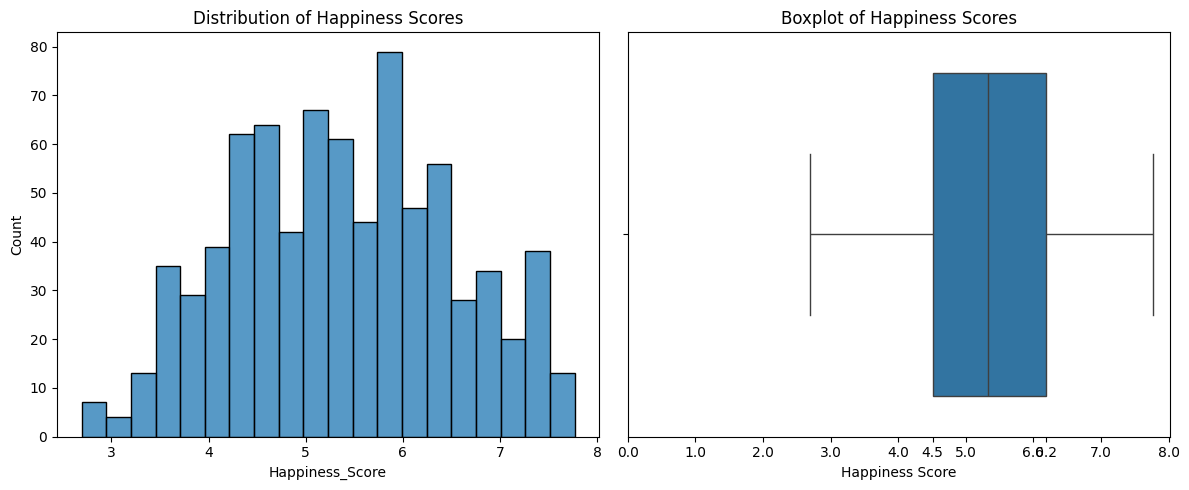

In [20]:
fig1, axes1 = plt.subplots(1, 2, figsize=(12, 5))

# overall distribution of happiness score
sns.histplot(temp_data["Happiness_Score"], bins=20, ax=axes1[0])
plt.xticks(range(0,9,1))
axes1[0].set_title('Distribution of Happiness Scores')
# plt.ylabel("Number of Countries")

sns.boxplot(x=temp_data['Happiness_Score'], ax=axes1[1])
axes1[1].set_title('Boxplot of Happiness Scores')
axes1[1].set_xlabel('Happiness Score')

hq1 = temp_data['Happiness_Score'].quantile(0.25)
hq3 = temp_data['Happiness_Score'].quantile(0.75)

hxticks = list(axes1[1].get_xticks()) + [hq1, hq3]
axes1[1].set_xticks(sorted(hxticks))
axes1[1].set_xticklabels([f"{tick:.1f}" for tick in sorted(hxticks)])


plt.tight_layout()
plt.show()

Observations:
- The happiness score ranges between 2 and 8 for the countries ranked in this dataset with majority of the countries having a score between 4.5 and 6.2
- The average happiness_score is 5.37 with minimum score being 2.69 and maximum score being 7.76

In [ ]:
temp_data['Economy_Score'].describe()

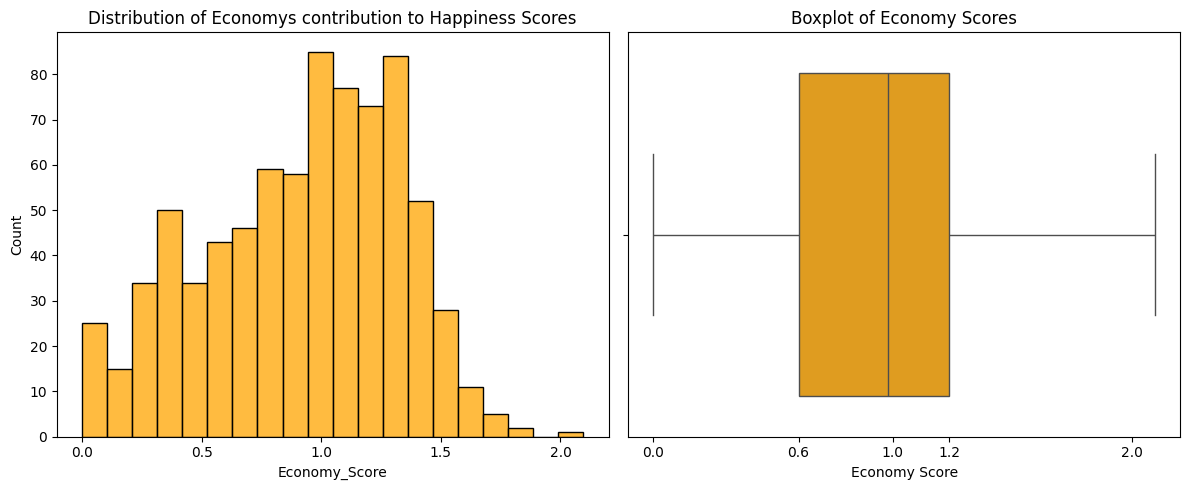

In [21]:
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

# overall distribution of economy score
sns.histplot(temp_data["Economy_Score"], bins=20, ax=axes2[0], color = 'orange')
plt.xticks(range(0,3,1))
axes2[0].set_title('Distribution of Economy''s contribution to Happiness Scores')

sns.boxplot(x=temp_data['Economy_Score'], ax=axes2[1], color='orange')
axes2[1].set_title('Boxplot of Economy Scores')
axes2[1].set_xlabel('Economy Score')

eq1 = temp_data['Economy_Score'].quantile(0.25)
eq3 = temp_data['Economy_Score'].quantile(0.75)

exticks = list(axes2[1].get_xticks()) + [eq1, eq3]
axes2[1].set_xticks(sorted(exticks))
axes2[1].set_xticklabels([f"{tick:.1f}" for tick in sorted(exticks)])

plt.tight_layout()
plt.show()

In [77]:
temp_data[temp_data['Economy_Score'] > 2.0]

,Year,Country,Region,Happiness_Rank,Happiness_Score,Economy_Score,Family_Score,Life_Expectancy_Score,Freedom_Score,Government_Trust_Score,Generosity_Score
489,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Observations: 🇰
 - The economy score for countries range between 0 and 2 with most of the countries having a score between 0.6 and 1.2
 - one country seems to have the highest score that is significantly higher than others - UAE.
 - Economic improvements was a significant contributor to UAE's happiness evaluations for the year 2018.

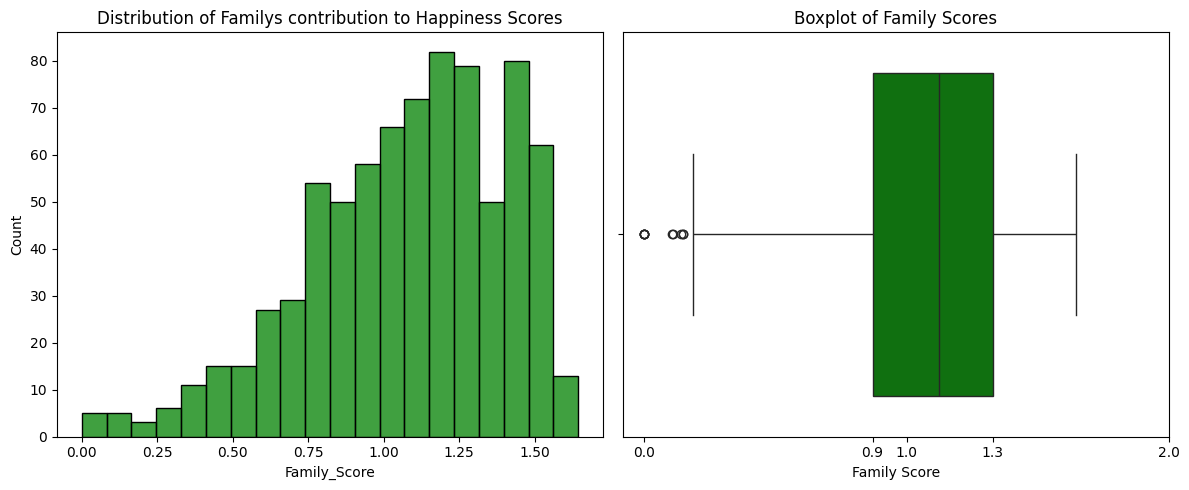

In [19]:
# The family score for countries range between
fig3, axes3 = plt.subplots(1, 2, figsize=(12, 5))

# overall distribution of family score
sns.histplot(temp_data["Family_Score"], bins=20, ax=axes3[0], color = 'green')
plt.xticks(range(0,3,1))
axes3[0].set_title('Distribution of Family''s contribution to Happiness Scores')

sns.boxplot(x=temp_data['Family_Score'], ax=axes3[1], color='green')
axes3[1].set_title('Boxplot of Family Scores')
axes3[1].set_xlabel('Family Score')

fq1 = temp_data['Family_Score'].quantile(0.25)
fq3 = temp_data['Family_Score'].quantile(0.75)

fxticks = list(axes3[1].get_xticks()) + [fq1, fq3]
axes3[1].set_xticks(sorted(fxticks))
axes3[1].set_xticklabels([f"{tick:.1f}" for tick in sorted(fxticks)])

plt.tight_layout()
plt.show()

Observations:
- Family / Social Support score ranges between 0 and 1.6 with most countries scoring between 0.9 and 1.3
- We notice some outliers in the family score attribute.

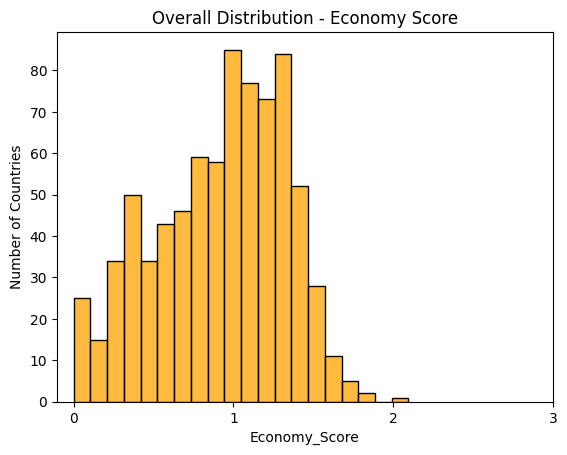

In [ ]:
# overall distribution of life-expectancy score
sns.histplot(temp_data["Economy_Score"], bins=20, color='orange')
plt.title("Overall Distribution - Economy Score")
plt.ylabel("Number of Countries")
plt.xticks(range(0,4,1))
plt.show()
# The economy score for countries range between

In [49]:
# Split the dataset by year into separate dataframes
data_2015=temp_data[temp_data['Year'] == 2015]
data_2016=temp_data[temp_data['Year'] == 2016]
data_2017=temp_data[temp_data['Year'] == 2017]
data_2018=temp_data[temp_data['Year'] == 2018]
data_2019=temp_data[temp_data['Year'] == 2019]

Part 4: Analyzing trends over time

In [ ]:
# Line plot of country vs score over time
sns.lineplot(data=df, x="Year", y="Score", hue="Country", legend=False)
plt.title("Score Trends Over Time by Country")
plt.show()